### Cargo librerías y el dataset

In [13]:
import numpy as np #manejo de arreglos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets #conjuntos de datos
from sklearn.decomposition import PCA #Componentes principales
import pandas as pd #manejo de arreglos, parecido al dataframe de R
from sklearn.preprocessing import StandardScaler #Escalado de datos

plt.rcParams["figure.figsize"] = (25,25) #tamaño de los gráficos

### levantando datos del csv

In [8]:
#https://www.kaggle.com/adityakadiwal/water-potability

datos = np.genfromtxt('/content/water_potability.csv',delimiter=',', skip_header=1) #, usecols = (1,2,7))
#elimina todas las filas con "nan"
datos = datos[~np.isnan(datos).any(axis=1)]

#datos = pd.read_csv("/content/water_potability.csv", delimiter=',', skiprows=1)

#datos = np.loadtxt('/content/water_potability.csv', delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )

print (datos)

print(datos.shape)
print(datos[0:5,:])

nombres = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Org_carbon','Trihalomethanes','Turbidity','Potability']#,'target']

# 1.Ph
# 2.Hardness
# 3.Solids
# 4.Chloramines
# 5.Sulfate
# 6.Conductivity
# 7.Organic_carbon
# 8.Trihalomethanes
# 9.Turbidity
# 10.Potability

X = datos[:,0:-1]
print(X.shape)
print(X[0:5,:])

y = datos[:,-1]
print(y.shape)
print(y[0:5])

[[8.31676588e+00 2.14373394e+02 2.20184174e+04 ... 1.00341674e+02
  4.62877054e+00 0.00000000e+00]
 [9.09222346e+00 1.81101509e+02 1.79789863e+04 ... 3.19979927e+01
  4.07507543e+00 0.00000000e+00]
 [5.58408664e+00 1.88313324e+02 2.87486877e+04 ... 5.49178618e+01
  2.55970823e+00 0.00000000e+00]
 ...
 [1.14910109e+01 9.48125452e+01 3.71888260e+04 ... 4.15585007e+01
  4.36926431e+00 1.00000000e+00]
 [6.06961576e+00 1.86659040e+02 2.61387802e+04 ... 6.04199211e+01
  3.66971170e+00 1.00000000e+00]
 [4.66810169e+00 1.93681735e+02 4.75809916e+04 ... 6.66876948e+01
  4.43582091e+00 1.00000000e+00]]
(2011, 10)
[[8.31676588e+00 2.14373394e+02 2.20184174e+04 8.05933238e+00
  3.56886136e+02 3.63266516e+02 1.84365245e+01 1.00341674e+02
  4.62877054e+00 0.00000000e+00]
 [9.09222346e+00 1.81101509e+02 1.79789863e+04 6.54659997e+00
  3.10135738e+02 3.98410813e+02 1.15582794e+01 3.19979927e+01
  4.07507543e+00 0.00000000e+00]
 [5.58408664e+00 1.88313324e+02 2.87486877e+04 7.54486879e+00
  3.26678363e

In [9]:
# Escalo los datos
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Aplico Componentes principales
pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)


In [10]:
#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])

[0.13410812 0.13005308 0.1162131  0.11228429 0.11167097 0.1078386
 0.10572129 0.09705701 0.08505354]
[0.134, 0.13, 0.116, 0.112, 0.112, 0.108, 0.106, 0.097, 0.085]


In [11]:
#Cargas o loadings
print(pca.components_)

[[-0.47404071 -0.21606914  0.66225649 -0.06779952 -0.45863379 -0.01664511
  -0.16382524 -0.04620069  0.21406511]
 [-0.38863879 -0.62587007 -0.16821895  0.2597866   0.54146414 -0.16084655
  -0.08868279 -0.04434396  0.18048214]
 [-0.02855533 -0.17244337  0.11815196 -0.59443501  0.2424053   0.37054766
   0.51549467 -0.36757885  0.07225053]
 [ 0.06350484  0.28462248 -0.15566146  0.17142755 -0.03075806  0.03163354
  -0.25103235 -0.69650358  0.55790507]
 [-0.0458843   0.07133336  0.12673165 -0.1188623   0.04773887 -0.7479588
   0.10830838 -0.45206732 -0.42988381]
 [ 0.02559969 -0.07436301 -0.05769798 -0.50058809  0.15568366  0.15423477
  -0.78419574 -0.07045015 -0.26822632]
 [-0.26977197  0.02846038  0.0030525   0.45328296 -0.05988011  0.49747192
   0.01743162 -0.35339691 -0.58709553]
 [ 0.73741317 -0.47688068  0.37314318  0.2331144  -0.01397518  0.04687941
  -0.07095278 -0.16076458 -0.04422602]
 [ 0.00901164 -0.46044611 -0.57990796 -0.14369872 -0.63754835 -0.05136489
   0.06717762 -0.124919

([<matplotlib.lines.Line2D object at 0x7f0db704e090>, <matplotlib.lines.Line2D object at 0x7f0db7032490>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


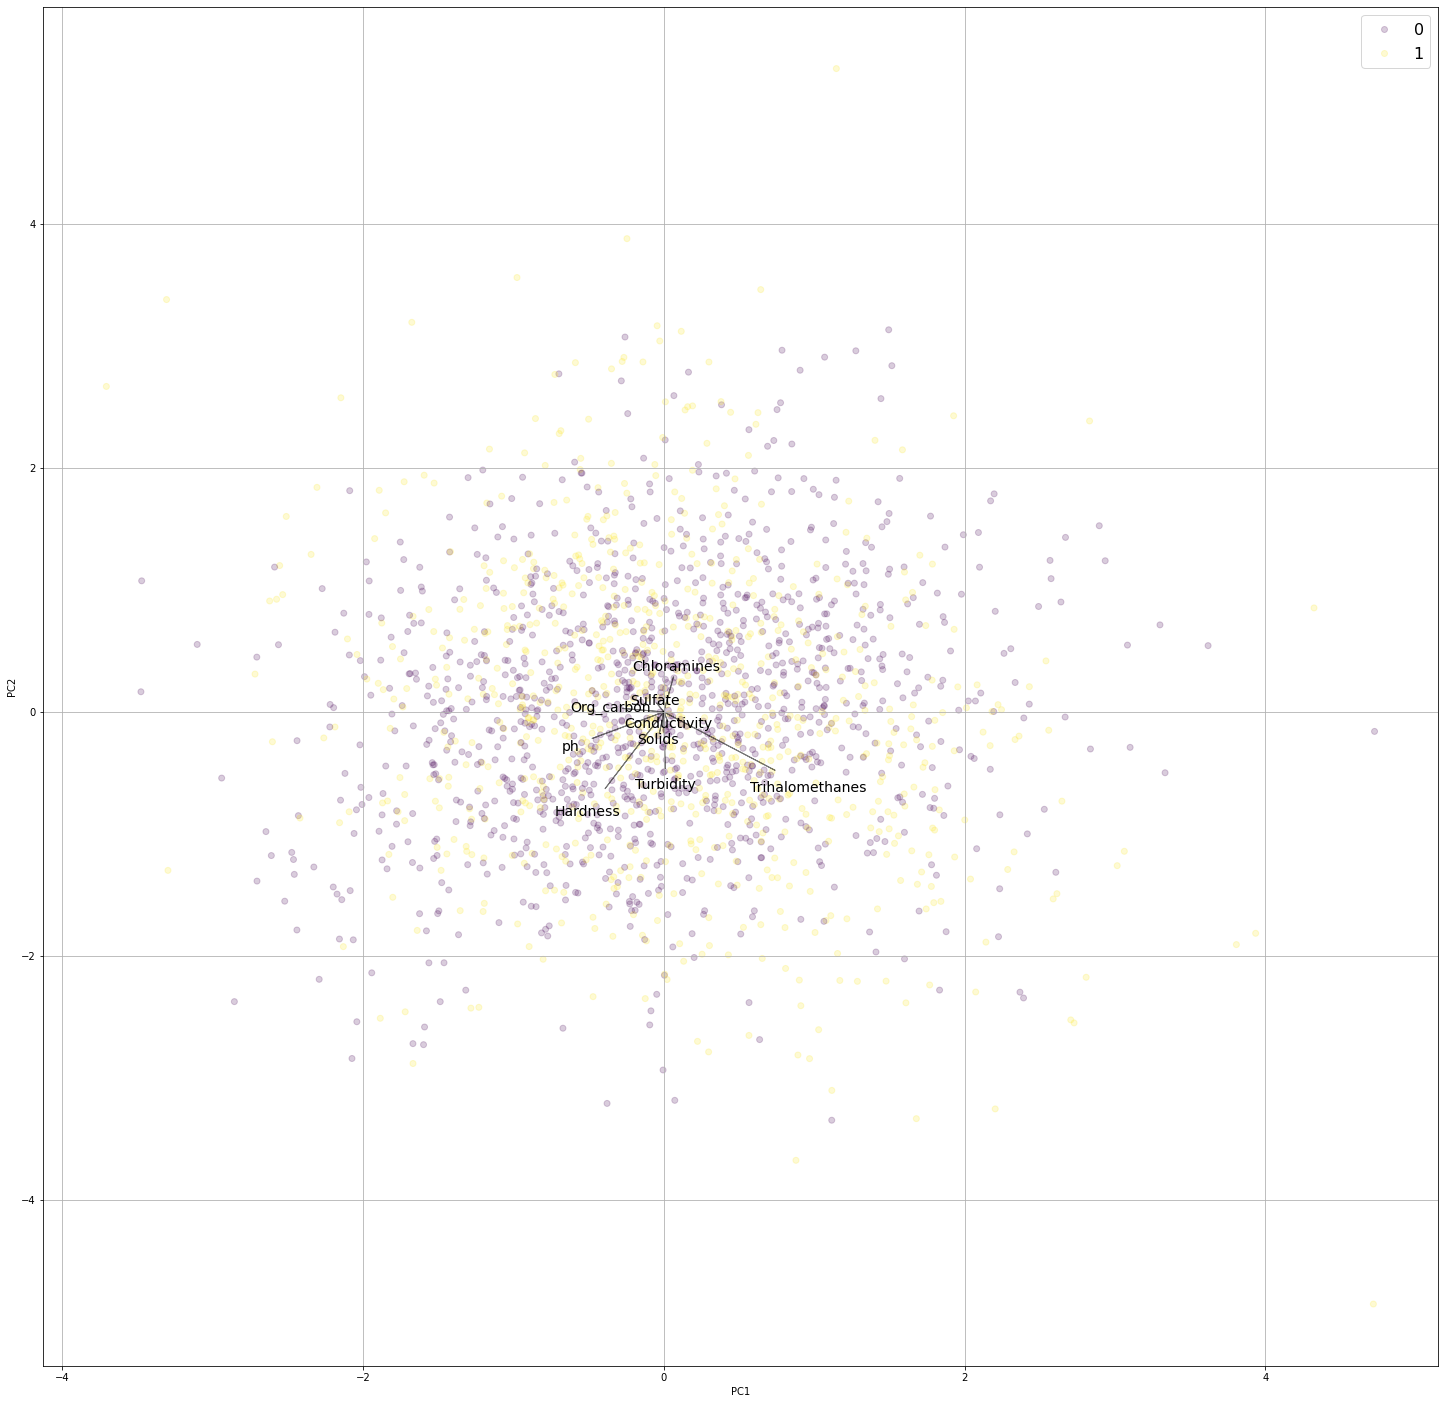

In [14]:
#Grafico las primeras dos componentes principales
def myplot(score,coeff,labels=None,target_names=None):
     x1 = score[:,0]
     x2 = score[:,1]
     n = coeff.shape[0]

     clases = target_names
     scatter = plt.scatter(x1, x2, c=y, alpha=0.2) #, cmap=colours)
     plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=19)
     print(scatter.legend_elements())
     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

# flechas de las proyecciones de las variables originales
     for i in range(n):
         plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.5)
         if labels is None:
             plt.text(coeff[i,0]* 1.30, coeff[i,1] * 1.30, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center', fontsize=14)
         else:
             plt.text(coeff[i,0]* 1.30, coeff[i,1] * 1.30, labels[i], color = 'k', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()